# Scrape Data and Plot a Correlation Heatmap

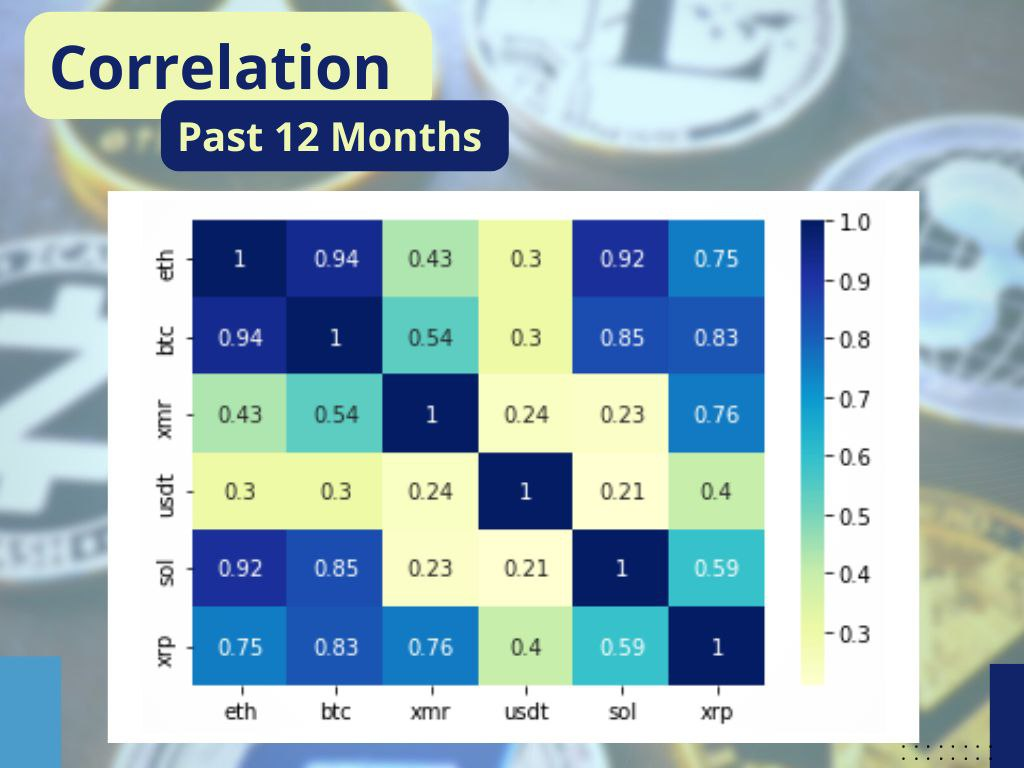

In [1]:
#import packages
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

### **Fetch Data from source**

In [2]:
zardf=pd.read_csv("https://query1.finance.yahoo.com/v7/finance/download/ZAR=X?period1=1622297317&period2=1653833317&interval=1d&events=history&includeAdjustedClose=true")
soldf=pd.read_csv("https://query1.finance.yahoo.com/v7/finance/download/"+"SOL"+"-USD?period1=1622246400&period2=1653782400&interval=1d&events=history&includeAdjustedClose=true")
xrpdf=pd.read_csv("https://query1.finance.yahoo.com/v7/finance/download/"+"XRP"+"-USD?period1=1622246400&period2=1653782400&interval=1d&events=history&includeAjustedClose=true")
btcdf=pd.read_csv("https://query1.finance.yahoo.com/v7/finance/download/"+"BTC"+"-USD?period1=1622246400&period2=1653782400&interval=1d&events=history&includeAdjustedClose=true")
ethdf=pd.read_csv("https://query1.finance.yahoo.com/v7/finance/download/"+"ETH"+"-USD?period1=1622246400&period2=1653782400&interval=1d&events=history&includeAdjustedClose=true")
usdtdf=pd.read_csv("https://query1.finance.yahoo.com/v7/finance/download/"+"USDT"+"-USD?period1=1622246400&period2=1653782400&interval=1d&events=history&includeAdjustedClose=true")
xmrdf=pd.read_csv("https://query1.finance.yahoo.com/v7/finance/download/"+"XMR"+"-USD?period1=1622246400&period2=1653782400&interval=1d&events=history&includeAdjustedClose=true")

In [3]:
#Check the count
print(xmrdf.count())
print(zardf.count())
print(soldf.count())
print(xrpdf.count())
print(btcdf.count())
print(ethdf.count())
print(usdtdf.count())

Date         366
Open         365
High         365
Low          365
Close        365
Adj Close    365
Volume       365
dtype: int64
Date         260
Open         260
High         260
Low          260
Close        260
Adj Close    260
Volume       260
dtype: int64
Date         366
Open         365
High         365
Low          365
Close        365
Adj Close    365
Volume       365
dtype: int64
Date         366
Open         365
High         365
Low          365
Close        365
Adj Close    365
Volume       365
dtype: int64
Date         366
Open         365
High         365
Low          365
Close        365
Adj Close    365
Volume       365
dtype: int64
Date         366
Open         365
High         365
Low          365
Close        365
Adj Close    365
Volume       365
dtype: int64
Date         366
Open         365
High         365
Low          365
Close        365
Adj Close    365
Volume       365
dtype: int64


## Create a dataframe

In [4]:
#Create a dataframe and fill with close price data from the last 12 months
coins=pd.DataFrame()
coins['eth']=ethdf['Close']
coins['btc']=btcdf['Close']
coins['xmr']=xmrdf['Close']
coins['usdt']=usdtdf['Close']
coins['sol']=soldf['Close']
coins['xrp'] =xrpdf['Close'] 
coins['zar']=zardf['Close']
coins.count()

eth     365
btc     365
xmr     365
usdt    365
sol     365
xrp     365
zar     260
dtype: int64

## Correlation and Heatmap

In [5]:
#Correlation Matrix of all assets
print(coins.corr())

           eth       btc       xmr      usdt       sol       xrp       zar
eth   1.000000  0.935573  0.430126  0.295524  0.918062  0.747486  0.438168
btc   0.935573  1.000000  0.534711  0.297151  0.844717  0.825360  0.529126
xmr   0.430126  0.534711  1.000000  0.234153  0.228587  0.754436 -0.185855
usdt  0.295524  0.297151  0.234153  1.000000  0.203550  0.386815 -0.048341
sol   0.918062  0.844717  0.228587  0.203550  1.000000  0.591490  0.561766
xrp   0.747486  0.825360  0.754436  0.386815  0.591490  1.000000  0.182845
zar   0.438168  0.529126 -0.185855 -0.048341  0.561766  0.182845  1.000000


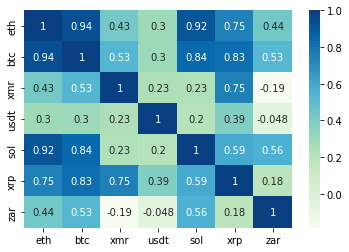

In [6]:
#Create a heatmap using seaborn
#BuPu YlGnBu
dataplot = sn.heatmap(coins.corr(), cmap="GnBu", annot=True)